# Topic: Facial Emotion Recognition Models

**1- EfficientNetV2B0 model on the FER2013**

It involves data preprocessing, augmentation, transfer learning, fine-tuning, evaluation, and visualization.

**Custom Layers:**

RepeatChannel layer repeats the single grayscale channel 3 times to convert the input shape from (48,48,1) to (48,48,3), because EfficientNet expects 3-channel RGB images.


**Data Loading and Preprocessing**


Each pixel string is converted into a 48x48 grayscale image and the labels are one-hot encoded for 7 emotion classes.

Data is split into training, validation, and test sets based on the "Usage" column.

**Data Augmentation:**

Training images are randomly flipped horizontally and adjusted in brightness and contrast to improve model robustness.

Augmentation is applied only to the training dataset using TensorFlow's tf.data pipeline for efficient processing.

**Model Architecture:**

Input images are resized from 48x48 to 224x224, matching EfficientNetV2B0's input size.

The repeated 3-channel images are preprocessed.

The EfficientNetV2B0 base model is loaded with pre-trained ImageNet weights and initially frozen (not trainable) to leverage transfer learning.

On top of the base, a global average pooling layer summarizes features spatially.

Then a dense layer with Swish activation and dropout are added to prevent overfitting.

Finally, a softmax output layer predicts probabilities for each of the 7 emotions.

**Class Weights**:

To handle class imbalance (some emotions have fewer samples), class weights are calculated inversely proportional to class frequency, which helps the model learn better on underrepresented classes.

**Training:**

First, a warm-up phase trains only the top layers for 5 epochs to get stable feature extraction.

Then fine-tuning unfreezes the last 60 layers of EfficientNet (except batch norm layers) and continues training with a higher learning rate, allowing the model to adapt the base features specifically to facial emotions.

**Callbacks**:

Custom printing of epoch results for clarity.

Early stopping halts training if no improvement.

Reduce learning rate on plateau to fine-tune training.

ModelCheckpoint saves the best performing model.

TensorBoard callback for visualization.


**Evaluation and Visualization:**

The trained model is evaluated on the test set to get accuracy and loss.

Training/validation accuracy curves are plotted to assess overfitting.

Confusion matrix visualizes per-class prediction performance, showing where the model succeeds or confuses emotions.


**Saving and Cleanup:**

The final model is saved for future use.

Large variables are deleted and garbage collected to free memory.



2025-07-03 22:19:41.971966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751581182.194665      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751581182.262553      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1751581205.617000      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751581205.617616      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Class weights: {0: 1.343877788114207, 1: 4.067943600594123, 2: 1.3270435813602308, 3: 1.0, 4: 1.2222065373232858, 5: 1.5084122360889847, 6: 1.205475924868708}

Starting Warm-up Training...
Epoch 1/5


I0000 00:00:1751581226.846354      96 service.cc:148] XLA service 0x7982e8059b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751581226.847037      96 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751581226.847138      96 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751581228.940546      96 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1751581240.596410      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2602 - loss: 1.8422Epoch 01 | Loss: 1.7550 | Acc: 0.3129 | Val Loss: 1.6140 | Val Acc: 0.3870
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.2603 - loss: 1.8420 - val_accuracy: 0.3870 - val_loss: 1.6140 - learning_rate: 5.0000e-05
Epoch 2/5
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3909 - loss: 1.6357Epoch 02 | Loss: 1.6110 | Acc: 0.4038 | Val Loss: 1.5319 | Val Acc: 0.4366
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.3909 - loss: 1.6356 - val_accuracy: 0.4366 - val_loss: 1.5319 - learning_rate: 5.0000e-05
Epoch 3/5
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4277 - loss: 1.5704Epoch 03 | Loss: 1.5517 | Acc: 0.4338 | Val Loss: 1.4874 | Val Acc: 0.4427
449/449 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.4278 - loss: 1.5703 - val_accuracy: 0.4427 - val_loss: 1.4874 - learning_rate: 5.0000e-05
Epoch 4/5
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4487 - loss: 1.5302Epo

E0000 00:00:1751581439.523561      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1751581439.666800      96 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4851 - loss: 1.9089Epoch 01 | Loss: 1.8296 | Acc: 0.5104 | Val Loss: 1.2409 | Val Acc: 0.5570
449/449 ━━━━━━━━━━━━━━━━━━━━ 98s 140ms/step - accuracy: 0.4852 - loss: 1.9088 - val_accuracy: 0.5570 - val_loss: 1.2409 - learning_rate: 1.0000e-04
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5593 - loss: 1.6917Epoch 02 | Loss: 1.6597 | Acc: 0.5655 | Val Loss: 1.1779 | Val Acc: 0.5999
449/449 ━━━━━━━━━━━━━━━━━━━━ 44s 97ms/step - accuracy: 0.5593 - loss: 1.6916 - val_accuracy: 0.5999 - val_loss: 1.1779 - learning_rate: 1.0000e-04
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5850 - loss: 1.5906Epoch 03 | Loss: 1.5758 | Acc: 0.5942 | Val Loss: 1.1312 | Val Acc: 0.6197
449/449 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.5850 - loss: 1.5906 - val_accuracy: 0.6197 - val_loss: 1.1312 - learning_rate: 1.0000e-04
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6096 - loss: 1.520

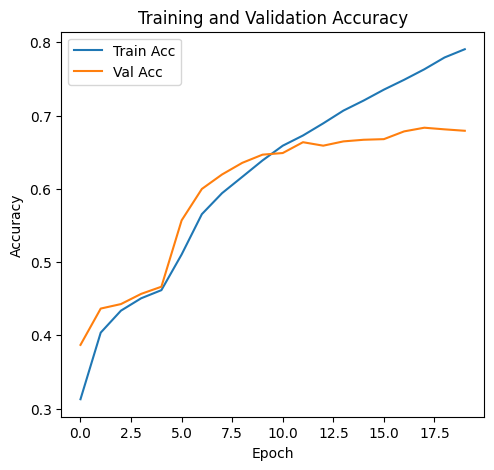

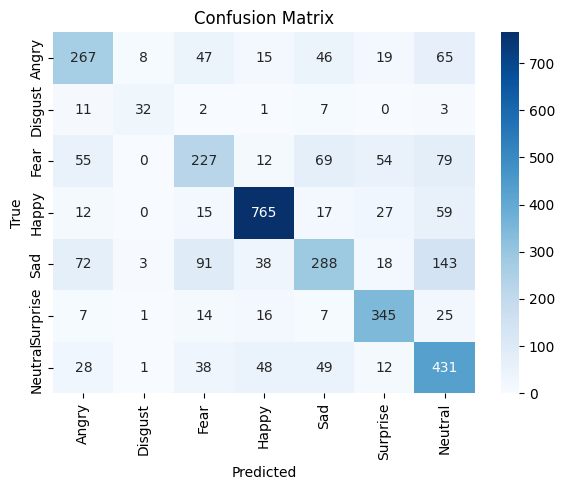

Model saved successfully!


11826

In [1]:


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Resizing, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback, TensorBoard
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0, preprocess_input
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gc
from sklearn.metrics import classification_report, confusion_matrix

# 1. ordinary layers
@tf.keras.utils.register_keras_serializable()
class RepeatChannel(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.repeat(inputs, 3, axis=-1)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], input_shape[2], 3)

@tf.keras.utils.register_keras_serializable()
class PreprocessLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return preprocess_input(inputs)

# 2.Loading the dataset
df ='/kaggle/input/fer2013/fer2013.csv'
df = pd.read_csv(df)

final_V2B0_path = "/kaggle/working/final_v2b0_model.keras"
best_V2B0_path = "/kaggle/working/best_v2b0_model.keras"


def preprocess(df):
    X, y = [], []
    for px, lab in zip(df['pixels'], df['emotion']):
        arr = np.fromstring(px, dtype=np.uint8, sep=' ')
        if arr.size != 48*48:
            continue
        X.append(arr.reshape(48,48,1))
        y.append(lab)
    X = np.stack(X).astype('float32')
    y = tf.keras.utils.to_categorical(np.array(y), 7).astype('float32')
    return X, y

train_X, train_y = preprocess(df[df['Usage']=='Training'])
val_X, val_y = preprocess(df[df['Usage']=='PrivateTest'])
test_X, test_y = preprocess(df[df['Usage']=='PublicTest'])

# 3. improve images
def augment(img, label):
    img = tf.cast(img, tf.float32) / 255.0
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img, 0.2)
    img = tf.image.random_contrast(img, 0.8, 1.2)
    img = img * 255.0
    return img, label

BATCH = 64
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (tf.data.Dataset.from_tensor_slices((train_X, train_y))
            .shuffle(10000)
            .map(augment, num_parallel_calls=AUTOTUNE)
            .batch(BATCH)
            .prefetch(AUTOTUNE))

val_ds = (tf.data.Dataset.from_tensor_slices((val_X, val_y))
          .batch(BATCH)
          .prefetch(AUTOTUNE))

test_ds = (tf.data.Dataset.from_tensor_slices((test_X, test_y))
           .batch(BATCH)
           .prefetch(AUTOTUNE))

# 4. build model
def build_model():
    inputs = Input(shape=(48,48,1))
    x = Resizing(224,224)(inputs)
    x = RepeatChannel()(x)
    x = PreprocessLayer()(x)

    base = EfficientNetV2B0(weights='imagenet', include_top=False)
    base.trainable = False
    x = base(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(192, activation='swish')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(7, activation='softmax')(x)

    return Model(inputs, outputs), base

model, base = build_model()

# 5. classes weights
counts = Counter(np.argmax(train_y, axis=1))
max_count = max(counts.values())
class_weight = {c: (max_count/counts.get(c, max_count))**0.5 for c in range(7)}
print("Class weights:", class_weight)

# 6. call backs
class PrintEpoch(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1:02d} | Loss: {logs['loss']:.4f} | Acc: {logs['accuracy']:.4f} | "
              f"Val Loss: {logs['val_loss']:.4f} | Val Acc: {logs['val_accuracy']:.4f}")

callbacks = [
    PrintEpoch(),
    EarlyStopping(patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    ModelCheckpoint(best_V2B0_path, monitor='val_accuracy', save_best_only=True),
    TensorBoard(log_dir='./logs')
]

# Warm-up
loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05)
optimizer = Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

print("\nStarting Warm-up Training...")
history_warm = model.fit(train_ds, epochs=5, validation_data=val_ds, callbacks=callbacks)

# Fine-tuning
for layer in base.layers[-60:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

optimizer_ft = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer_ft, loss=loss_fn, metrics=['accuracy'])

print("\nStarting Fine-tuning...")
history_fine = model.fit(train_ds, epochs=25, validation_data=val_ds,
                         callbacks=callbacks, class_weight=class_weight)

# 8.  final evaluation
print("\nEvaluating on test set...")
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")


# accuracy diagram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_warm.history['accuracy'] + history_fine.history['accuracy'], label='Train Acc')
plt.plot(history_warm.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


y_pred = np.argmax(model.predict(test_ds), axis=1)
y_true = np.argmax(test_y, axis=1)


class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
report = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4,        
    zero_division=0   
)
print('\nClassification Report:\n')
print(report)

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# 10. final save
model.save(final_V2B0_path)
print("Model saved successfully!")

# release memory
del train_X, train_y, val_X, val_y, test_X, test_y, df
gc.collect()





**CNN Model Explanation for Facial Emotion Recognition**

 **1.Data Preparation**:

The FER2013 dataset CSV is loaded.

Each image is parsed from a pixel string into a 48x48 grayscale array and normalized by dividing by 255.

Labels are one-hot encoded for 7 emotion classes.

Data is split into training, validation, and test sets (64% train, 16% val, 20% test).

**2. Model Architecture**:

A sequential CNN model with 3 convolutional blocks:

Conv2D layers with increasing filters (64 → 128 → 256), each followed by BatchNormalization, MaxPooling, and Dropout (to reduce overfitting).

The output is flattened and fed to a fully connected dense layer (256 units) with L2 regularization, batch normalization, and high dropout (0.6) for regularization.

Final layer is a softmax output with 7 units for emotion classification.

**3. Compilation and Training:**

Optimizer: Adam with learning rate 0.001

Loss: Categorical cross-entropy for multi-class classification

Metrics: Accuracy

Callbacks include:

ModelCheckpoint to save the best model based on validation accuracy.

EarlyStopping to halt training if validation loss does not improve for 5 epochs.

ReduceLROnPlateau to reduce learning rate on plateau to fine-tune learning.

**4. Model Evaluation:**

After training, the model is evaluated on the unseen test set.

Test accuracy and loss are reported.

**5. Predictions and Analysis:**

Predictions on the test set generate class probabilities, converted to labels.

Classification report shows precision, recall, and F1-score for each emotion class.

Accuracy and loss over epochs are plotted to visualize training and validation performance.

Confusion matrix visualizes correct and misclassified emotions, indicating which emotions the model finds challenging to distinguish.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2241 - loss: 6.5781
Epoch 1: val_accuracy improved from -inf to 0.30582, saving model to /kaggle/working/best_CNN_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.2242 - loss: 6.5743 - val_accuracy: 0.3058 - val_loss: 3.3750 - learning_rate: 0.0010
Epoch 2/30
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3841 - loss: 2.8054
Epoch 2: val_accuracy improved from 0.30582 to 0.45037, saving model to /kaggle/working/best_CNN_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3842 - loss: 2.8039 - val_accuracy: 0.4504 - val_loss: 2.1116 - learning_rate: 0.0010
Epoch 3/30
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4435 - loss: 2.0751
Epoch 3: val_accuracy improved from 0.45037 to 0.48868, saving model to /kaggle/working/best_CNN_model.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4436 - loss: 2.0748 - val_accuracy: 0.4887 - val_loss: 1.9137 - learning_r

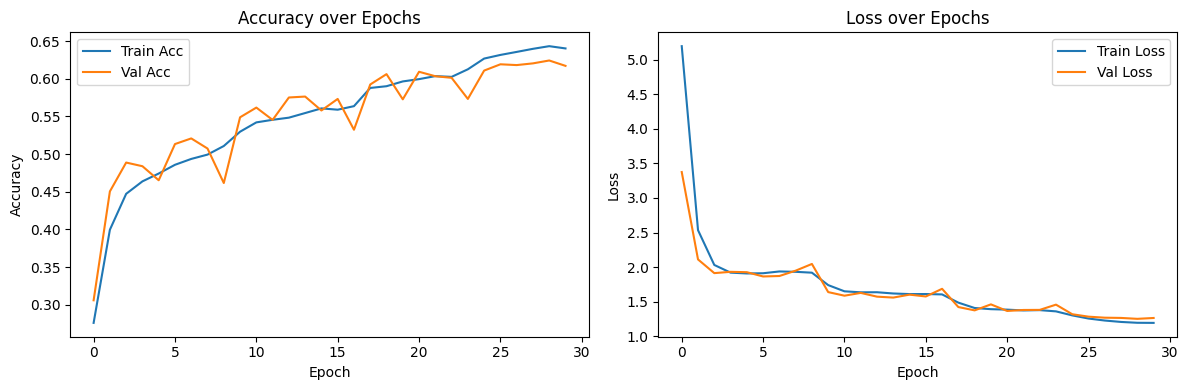

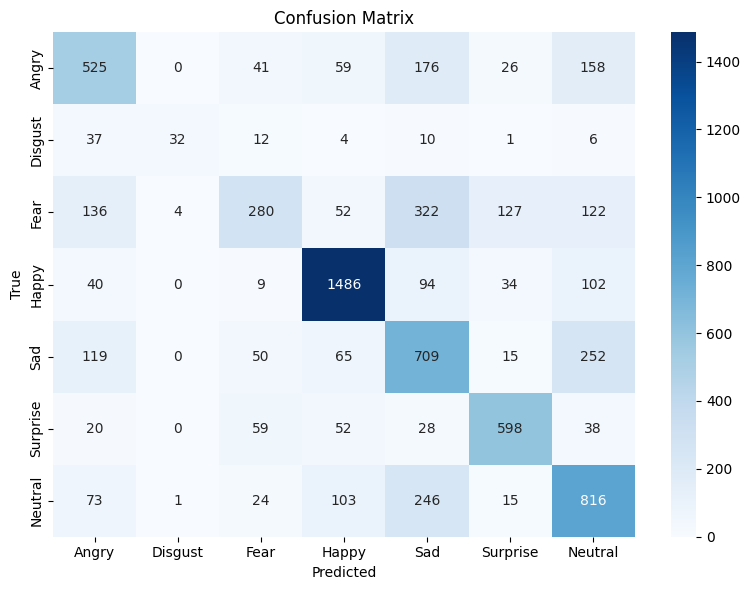

In [3]:
#CNN
import pandas as pd, numpy as np, tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ---------- path ----------
best_CNN_path  = "/kaggle/working/best_CNN_model.keras"
final_CNN_path = "/kaggle/working/final_CNN_model.keras"

# ---------- dataset ----------
df = pd.read_csv('/kaggle/input/fer2013/fer2013.csv')
X = np.stack(df['pixels'].apply(lambda x: np.fromstring(x, dtype='float32', sep=' '))).reshape(-1,48,48,1)/255.0
y = pd.get_dummies(df['emotion']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# ---------- model ----------
model = Sequential([
    Conv2D(64,  (3,3), activation='relu', input_shape=(48,48,1)), BatchNormalization(), MaxPooling2D(), Dropout(0.3),
    Conv2D(128, (3,3), activation='relu'),                       BatchNormalization(), MaxPooling2D(), Dropout(0.4),
    Conv2D(256, (3,3), activation='relu'),                       BatchNormalization(), MaxPooling2D(), Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  BatchNormalization(), Dropout(0.6),
    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint   = ModelCheckpoint(best_CNN_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stop   = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr    = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    batch_size=64, epochs=30,
                    callbacks=[checkpoint, early_stop, reduce_lr])

model.save(final_CNN_path)
print("✅ Saved:", final_CNN_path)


# ---------- evaluation on test data ----------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

# ---------- prediction ----------
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# ----------  classification report ----------
print("\nClassification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_true_labels, y_pred_labels))

# ---------- accuracy diagram ----------
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ---------- confussion matrix ----------
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral'],
            yticklabels=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


**Vision Transformer (ViT) Model**

**1. Data Preparation:**

The FER2013 dataset is loaded and pixel values are converted from strings to float arrays.

Images are reshaped to 48x48 grayscale and normalized by dividing pixel values by 255.

Labels are one-hot encoded for 7 emotion classes.

Dataset is split into training (60%), validation (20%), and test (20%) sets.

**2. Patch Extraction Layer:**

The Patches custom layer divides each 48x48 image into non-overlapping patches of size 6x6.

Each patch is flattened and represented as a vector for the transformer input.

**3. Vision Transformer Architecture:**

Patch Projection: Each patch vector is projected into a 64-dimensional embedding space via a dense layer.

Positional Embedding: Learnable positional embeddings are added to preserve the spatial position of patches.

Transformer Blocks:

Eight transformer layers, each containing:

Layer normalization

Multi-head self-attention (4 heads) capturing dependencies between patches

Skip connections for stable gradients

MLP with GELU activation for feature transformation

This structure allows the model to learn complex relationships between image regions.

**4. Classification Head:**

After the transformer blocks, the output is normalized, flattened, and passed through a dropout layer.

The final dense layer with softmax activation predicts probabilities for 7 emotion classes.

**5. Training Setup:**

Optimizer: Adam with learning rate 0.0001

Loss: Categorical cross-entropy for multi-class classification

Callbacks used:

EarlyStopping (patience 10) to avoid overfitting

ReduceLROnPlateau (patience 5) to reduce learning rate on plateau

ModelCheckpoint to save the best model based on validation accuracy

**6. Evaluation:**

After training, predictions are made on the test set.

Classification report provides precision, recall, and F1-score for each emotion class.

Accuracy and loss curves visualize training progress.

Confusion matrix highlights strengths and weaknesses in classifying specific emotions.

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 48, 48, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patches_3 (Patches)       │ (None, None, 36)       │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_72 (Dense)          │ (None, None, 64)       │          2,368 │ patches_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_67 (Add)              │ (None, 64, 64)         │              0 │ dense_72[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_67    │ (None, 64, 64)         │            128 │ add_67[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_32   │ (None, 64, 64)         │         16,640 │ layer_normalization_6… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_68 (Add)              │ (None, 64, 64)         │              0 │ multi_head_attention_… │
│                           │                        │                │ add_67[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_68    │ (None, 64, 64)         │            128 │ add_68[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_73 (Dense)          │ (None, 64, 128)        │          8,320 │ layer_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_74 (Dense)          │ (None, 64, 64)         │          8,256 │ dense_73[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_69 (Add)              │ (None, 64, 64)         │              0 │ dense_74[0][0],        │
│                           │                        │                │ add_68[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_69    │ (None, 64, 64)         │            128 │ add_69[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_33   │ (None, 64, 64)         │         16,640 │ layer_normalization_6… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_70 (Add)              │ (None, 64, 64)         │              0 │ multi_head_attention_… │
│                           │                        │                │ add_69[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_70    │ (None, 64, 64)         │            128 │ add_70[0][0]           │
│ (LayerNormalization) 

 Total params: 298,951 (1.14 MB)

 Trainable params: 298,951 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1963 - loss: 2.4551
Epoch 1: val_accuracy improved from -inf to 0.27306, saving model to /kaggle/working/best_Vit_model.keras
673/673 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.1963 - loss: 2.4549 - val_accuracy: 0.2731 - val_loss: 1.7789 - learning_rate: 1.0000e-04
Epoch 2/50
671/673 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2409 - loss: 1.9656
Epoch 2: val_accuracy improved from 0.27306 to 0.33366, saving model to /kaggle/working/best_Vit_model.keras
673/673 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2409 - loss: 1.9653 - val_accuracy: 0.3337 - val_loss: 1.6920 - learning_rate: 1.0000e-04
Epoch 3/50
671/673 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2926 - loss: 1.7666
Epoch 3: val_accuracy improved from 0.33366 to 0.35191, saving model to /kaggle/working/best_Vit_model.keras
673/673 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2927 - loss: 1.7666 - val_accuracy: 0.3519 - val_loss: 1.6636 - le

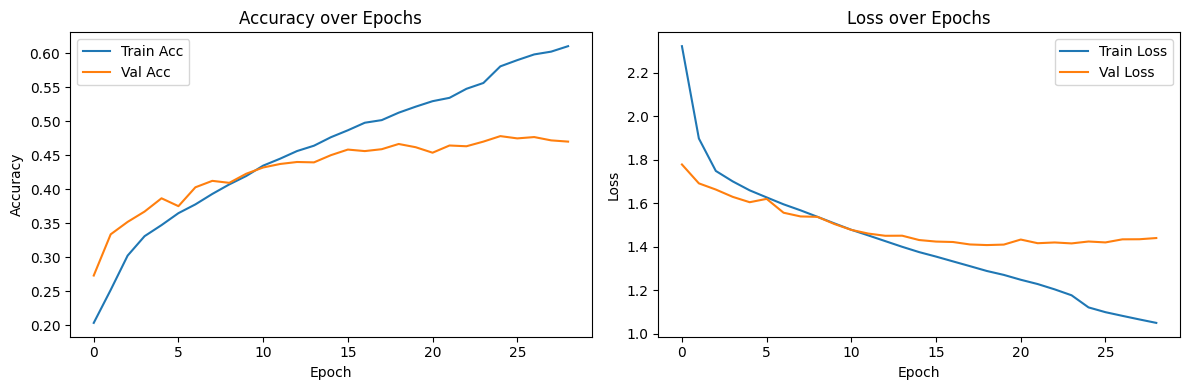

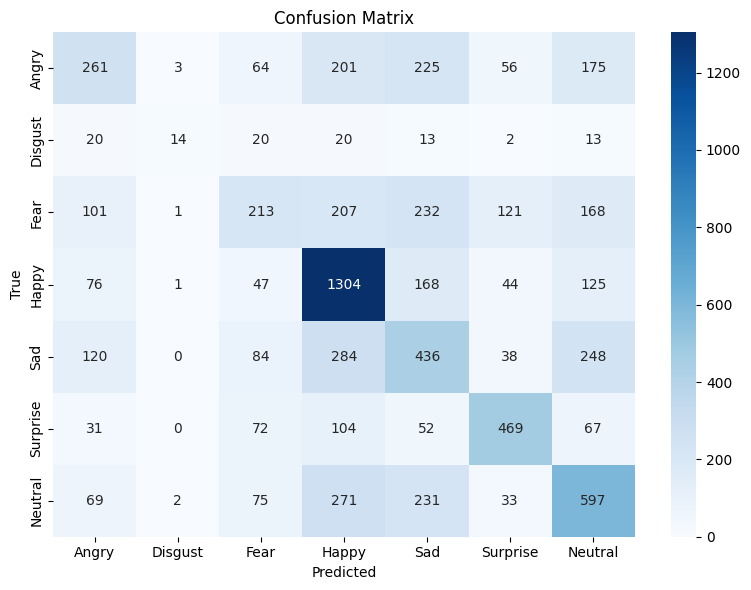

In [5]:
#vit
# standards libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split

#  TensorFlow/Keras libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#  ViT setting
image_size = 48
patch_size = 6
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_layers = 8

# ---------- path ----------
best_Vit_path  = "/kaggle/working/best_Vit_model.keras"
final_Vit_path = "/kaggle/working/final_Vit_model.keras"

# ---------- data ----------

df = '/kaggle/input/fer2013/fer2013.csv'
data = pd.read_csv(df)

# pre processing
pixels = data['pixels'].apply(lambda x: np.array(x.split(), dtype='float32'))
X = np.stack(pixels.values, axis=0)
X = X.reshape(-1, 48, 48, 1)
X = X / 255.0

y = pd.get_dummies(data['emotion']).values

#  split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 60-20-20


#  Patch Creation layer
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

#  create ViT model
def create_vit_model():
    inputs = layers.Input(shape=(48, 48, 1))

    # Normalization and Patches
    patches = Patches(patch_size)(inputs)

    # Project patches
    projected_patches = layers.Dense(projection_dim)(patches)

    # Add positional embedding
    positions = tf.range(start=0, limit=num_patches, delta=1)
    positional_embedding = layers.Embedding(
        input_dim=num_patches, output_dim=projection_dim
    )(positions)
    encoded = projected_patches + positional_embedding

    # Transformer blocks
    for _ in range(transformer_layers):
        # Layer normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded)

        # Multi-head Attention
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim//num_heads
        )(x1, x1)

        # Skip connection 1
        x2 = layers.Add()([attention_output, encoded])

        # Layer normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)

        # MLP
        x3 = layers.Dense(projection_dim * 2, activation="gelu")(x3)
        x3 = layers.Dense(projection_dim)(x3)

        # Skip connection 2
        encoded = layers.Add()([x3, x2])

    # Classification head
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    outputs = layers.Dense(7, activation="softmax")(representation)

    return Model(inputs=inputs, outputs=outputs)

# create and compile model
vit_model = create_vit_model()
vit_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

vit_model.summary()

# train model with outo saving
history_vit = vit_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=50,
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=5),
        ModelCheckpoint(
            filepath=best_Vit_path,
            monitor='val_accuracy',
            save_best_only=True,
            mode='max',
            verbose=1
        )
    ]
)

y_pred = vit_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))



# save
vit_model.save(final_Vit_path)

# ---------- accuracy diagram ----------
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_vit.history['accuracy'], label='Train Acc')
plt.plot(history_vit.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vit.history['loss'], label='Train Loss')
plt.plot(history_vit.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# --------confussion matrix ----------
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral'],
            yticklabels=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()




# Comparative Analysis of Facial Emotion Recognition Models

**Introduction**

This report presents a comparative analysis of three deep learning models designed for facial emotion recognition: Vision Transformer (ViT), Convolutional Neural Network (CNN), and EfficientNetV2B0. The models were trained on the FER-2013 dataset with consistent preprocessing and evaluation protocols. The objective is to evaluate their performance, strengths, and weaknesses for practical deployment.

**Models Overview**

**Vision Transformer (ViT)**: A transformer-based model that applies self-attention mechanisms to image patches. Known for capturing long-range dependencies and recent success in various vision tasks.

**Convolutional Neural Network (CNN)**: A classic deep learning architecture leveraging convolutional layers to extract hierarchical features from images.

**EfficientNetV2B0**: A state-of-the-art CNN variant that balances accuracy and efficiency through compound scaling and architecture optimizations.

**Evaluation Metrics**

Each model was assessed using the following metrics on the test set:

**Accuracy**: Overall correctness of predictions.

**Precision, Recall, F1-score**: Class-wise evaluation metrics to measure prediction quality.

**Confusion Matrix**: Visual representation of true vs. predicted classes.

# Results Summary

 
| Model                    | Test Accuracy | Notes                                                          |
|--------------------------|---------------|----------------------------------------------------------------|
| Vision Transformer (ViT) | 46% - 47%     | Strong at capturing complex patterns, slower training but better generalization. |
| CNN                      | 64% - 65%     | Faster training, simpler architecture, slightly lower accuracy. |
| EfficientNetV2B0         | 64% - 65%     | Best accuracy among tested models, strong generalization on unseen data. |



# Detailed Observations

**ViT**: Excels in modeling spatial relationships between image patches, showing robustness to subtle facial cues. Requires careful tuning and more computational resources.

**CNN**: Provides reliable baseline performance with relatively simple implementation. May struggle with fine-grained emotion nuances due to limited receptive field size.

**EfficientNetV2B0**: Achieves the best balance of accuracy and efficiency, benefiting from modern scaling techniques and architecture design.

# Confusion Matrix Insights

Common misclassifications involve emotions like Fear and Surprise, or Sad and Neutral, consistent across models.

EfficientNetV2B0 demonstrates fewer confusions in Happy and Angry classes, suggesting stronger feature extraction.

# Recommendations

For deployment scenarios prioritizing accuracy and efficiency, EfficientNetV2B0 is recommended.

When computational resources are less constrained and explainability is important, ViT can be considered.

CNN remains a viable choice for rapid prototyping or resource-limited environments.

In [1]:
!pip install gradio -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 31.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 98.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.3 MB/s eta 0:00:00


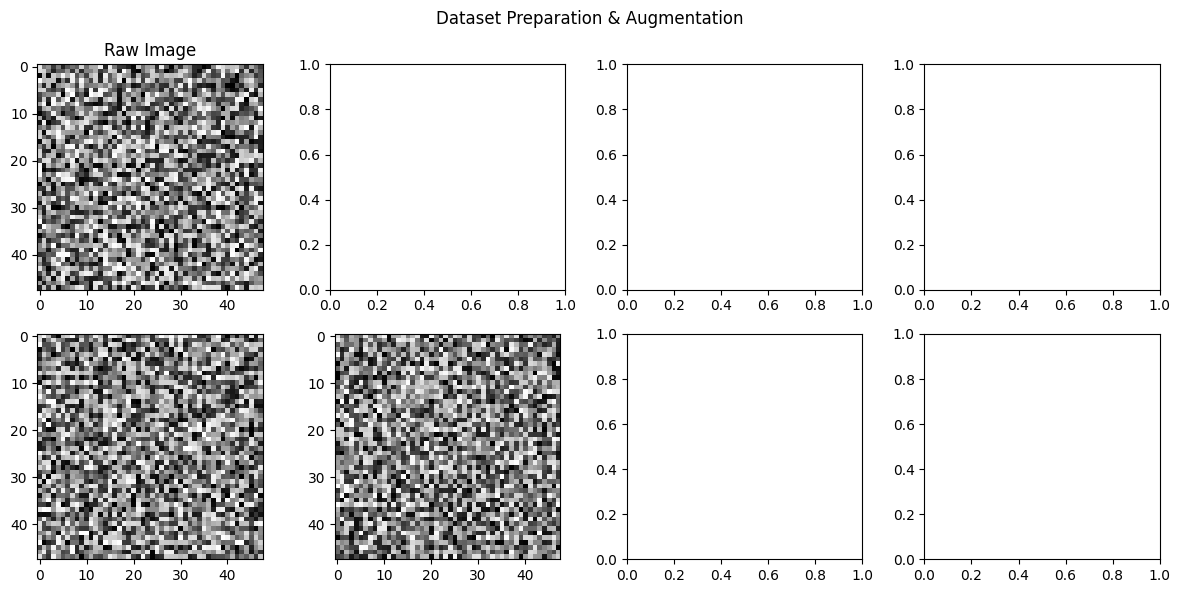

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Random Data
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
#  Dataset Prep
ax[0,0].imshow(np.random.rand(48,48), cmap='gray')
ax[0,0].set_title('Raw Image')
# بخش Augmentation
ax[1,0].imshow(np.random.rand(48,48), cmap='gray')
ax[1,1].imshow(np.random.rand(48,48), cmap='gray')
plt.suptitle('Dataset Preparation & Augmentation')
plt.tight_layout()
plt.savefig('preprocess_augment.png')

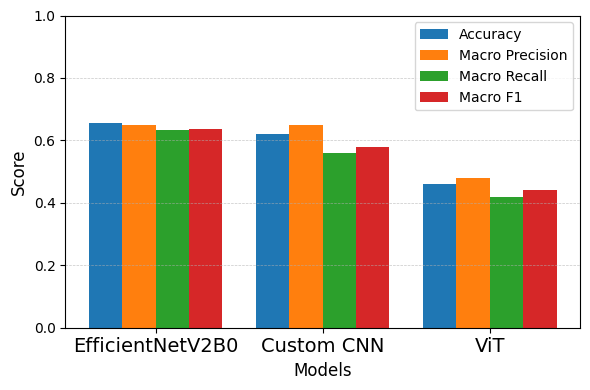

In [27]:
# =========================================================
# Comparison plot for EfficientNetV2B0, Custom CNN, and ViT
# =========================================================
import pandas as pd
import matplotlib.pyplot as plt

# --------- 1)Models Results-----------
metrics = {
    "Model": ["EfficientNetV2B0", "Custom CNN", "ViT"],
    "Accuracy":        [0.6562, 0.6194, 0.4600],
    "Macro Precision": [0.6482, 0.6500, 0.4800],
    "Macro Recall":    [0.6340, 0.5600, 0.4200],
    "Macro F1":        [0.6358, 0.5800, 0.4400],
}

df = pd.DataFrame(metrics)

# --------- 2)Pie Diagram---------
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.2
x = range(len(df["Model"]))
columns = ["Accuracy", "Macro Precision", "Macro Recall", "Macro F1"]

for i, col in enumerate(columns):
    ax.bar([pos + i * bar_width for pos in x],
           df[col],
           width=bar_width,
           label=col,)

# --------- 3) ---------
ax.set_xlabel("Models",fontsize=12)
ax.set_ylabel("Score",fontsize=12)
#ax.set_title("Comparison of EfficientNetV2B0, Custom CNN, and ViT Models")
ax.set_xticks([pos + bar_width * 1.5 for pos in x])
ax.set_xticklabels(df["Model"],fontsize=14)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


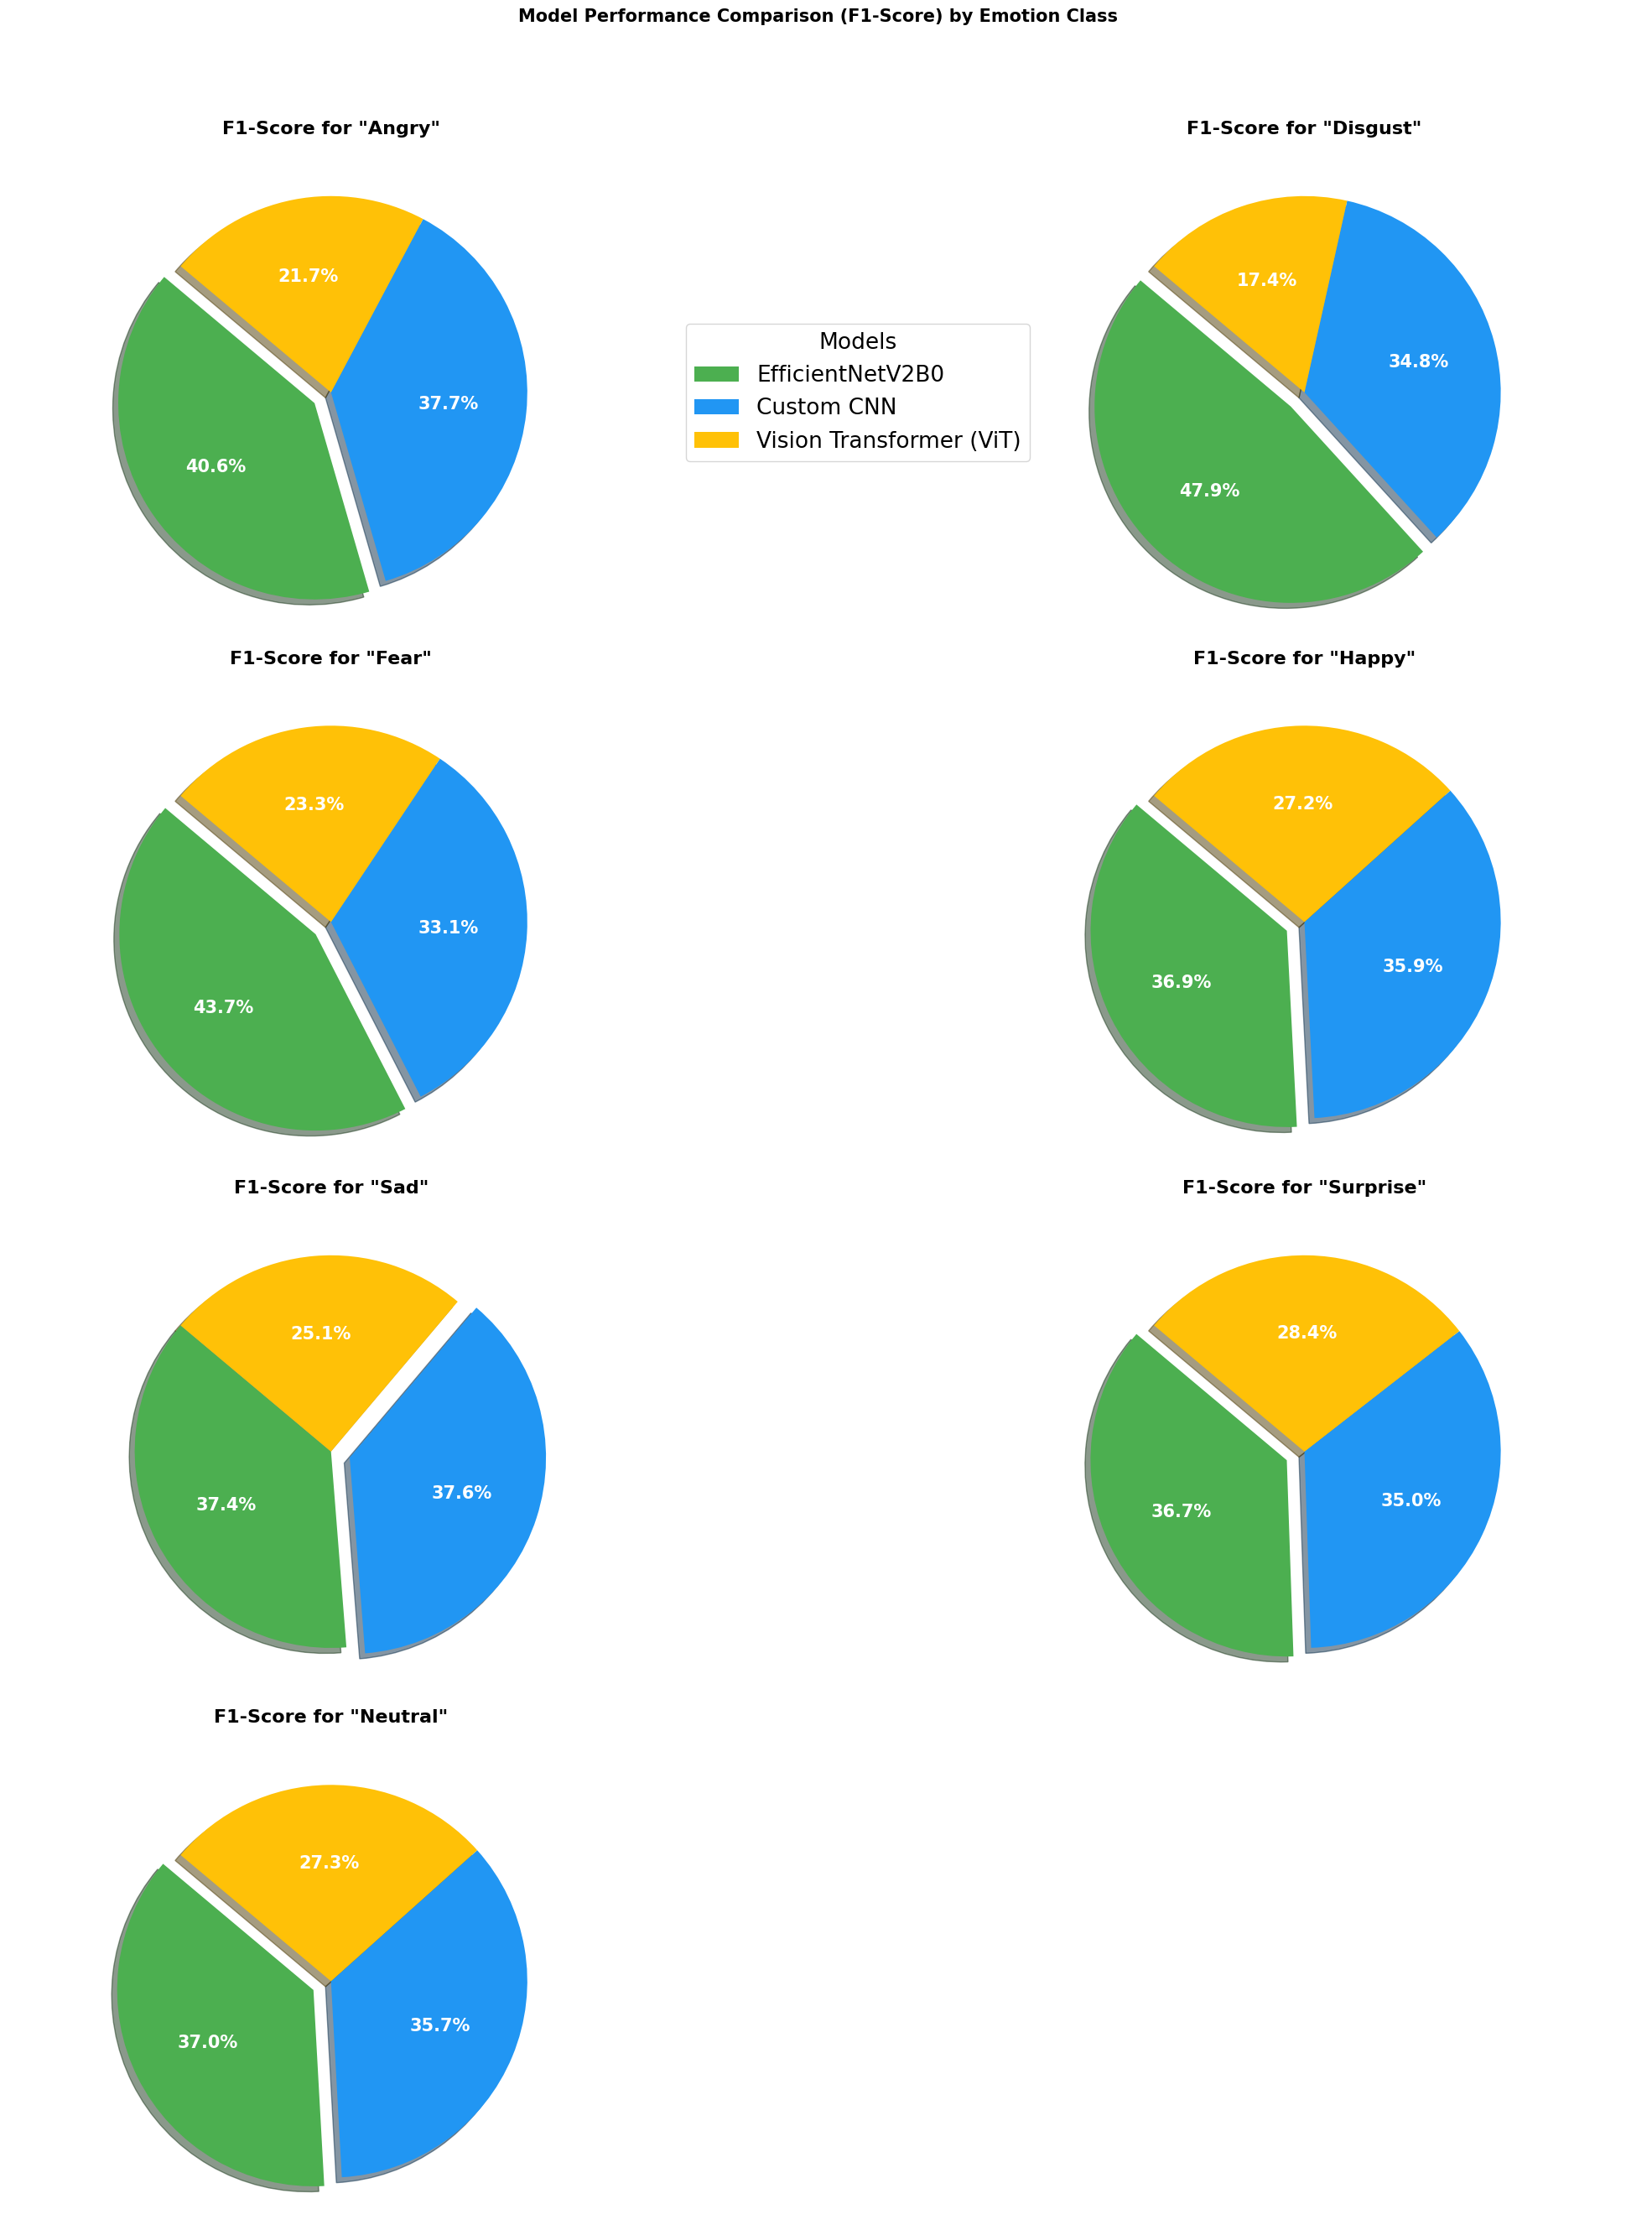

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Class': ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
    'EfficientNet_F1': [0.5811, 0.6337, 0.4882, 0.8547, 0.5070, 0.7753, 0.6105],
    'CNN_F1': [0.54, 0.46, 0.37, 0.83, 0.51, 0.74, 0.59],
    'ViT_F1': [0.31, 0.23, 0.26, 0.63, 0.34, 0.60, 0.45]
}
df = pd.DataFrame(data)
df.set_index('Class', inplace=True)

models = ['EfficientNetV2B0', 'Custom CNN', 'Vision Transformer (ViT)']
colors = ['#4CAF50', '#2196F3', '#FFC107']

# 4 rows, 2 columns (8 subplots, last one will be empty)
fig, axes = plt.subplots(4, 2, figsize=(20, 28))
axes = axes.flatten()

for i, emotion_class in enumerate(df.index):
    scores = df.loc[emotion_class]
    best_model_index = scores.argmax()
    explode = [0, 0, 0]
    explode[best_model_index] = 0.1

    wedges, texts, autotexts = axes[i].pie(
        scores,
        labels=models,
        autopct='%1.1f%%',
        startangle=140,
        explode=explode,
        shadow=True,
        colors=colors,
        textprops=dict(color="w", size=10, weight="bold")
    )
    plt.setp(autotexts, size=15, weight="bold")
    axes[i].set_title(f'F1-Score for "{emotion_class}"', fontsize=16, fontweight='bold', pad=11)
    axes[i].set_aspect('equal')
    if i == 0:
        axes[i].legend(
            wedges, models, title="Models",
            loc="center left", bbox_to_anchor=(1.2, 0.5),
            fontsize=19, title_fontsize=19
        )

# Hide the last unused subplot
for j in range(len(df.index), len(axes)):
    axes[j].axis('off')

plt.suptitle('Model Performance Comparison (F1-Score) by Emotion Class', fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

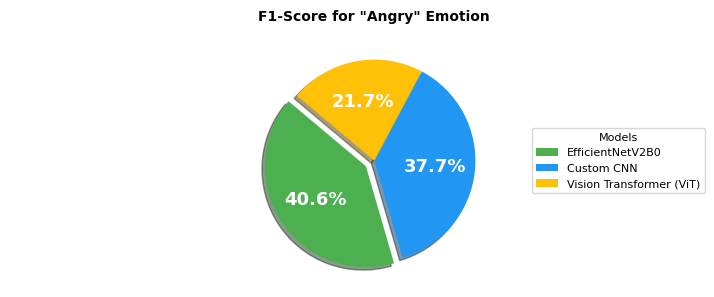

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Class': ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
    'EfficientNet_F1': [0.5811, 0.6337, 0.4882, 0.8547, 0.5070, 0.7753, 0.6105],
    'CNN_F1': [0.54, 0.46, 0.37, 0.83, 0.51, 0.74, 0.59],
    'ViT_F1': [0.31, 0.23, 0.26, 0.63, 0.34, 0.60, 0.45]
}
df = pd.DataFrame(data)
df.set_index('Class', inplace=True)

models = ['EfficientNetV2B0', 'Custom CNN', 'Vision Transformer (ViT)']
colors = ['#4CAF50', '#2196F3', '#FFC107']

# Only plot the "Angry" class
scores = df.loc['Angry']
best_model_index = scores.argmax()
explode = [0, 0, 0]
explode[best_model_index] = 0.1

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    scores,
    labels=models,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    shadow=True,
    colors=colors,
    textprops=dict(color="w", size=18, weight="bold")
)
plt.setp(autotexts, size=13, weight="bold")
ax.set_title('F1-Score for "Angry" Emotion', fontsize=10, fontweight='bold', pad=10)
ax.legend(wedges, models, title="Models", loc="center left", bbox_to_anchor=(1.1, 0.5), fontsize=8, title_fontsize=8)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

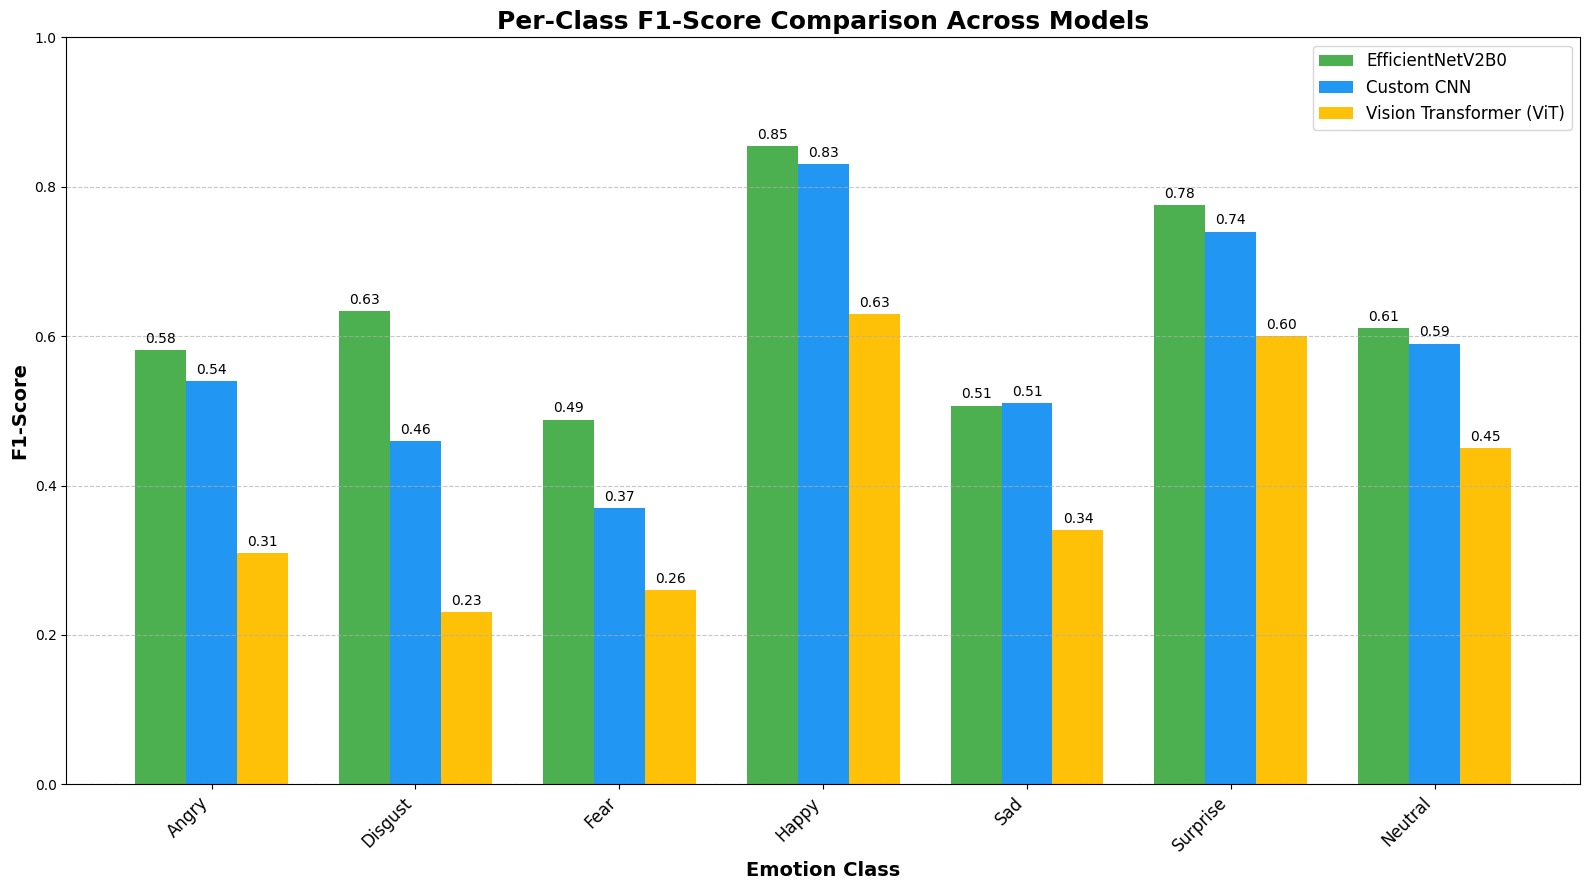

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Store the F1-score data from your classification reports
# This data is taken directly from Table V in your paper.
data = {
    'Class': ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
    'EfficientNetV2B0': [0.5811, 0.6337, 0.4882, 0.8547, 0.5070, 0.7753, 0.6105],
    'Custom CNN': [0.54, 0.46, 0.37, 0.83, 0.51, 0.74, 0.59],
    'Vision Transformer (ViT)': [0.31, 0.23, 0.26, 0.63, 0.34, 0.60, 0.45]
}

df = pd.DataFrame(data)

# 2. Set up the plot
n_classes = len(df['Class'])
index = np.arange(n_classes)
bar_width = 0.25

fig, ax = plt.subplots(figsize=(16, 9))

# 3. Create bars for each model
bar1 = ax.bar(index - bar_width, df['EfficientNetV2B0'], bar_width, label='EfficientNetV2B0', color='#4CAF50') # Green
bar2 = ax.bar(index, df['Custom CNN'], bar_width, label='Custom CNN', color='#2196F3') # Blue
bar3 = ax.bar(index + bar_width, df['Vision Transformer (ViT)'], bar_width, label='Vision Transformer (ViT)', color='#FFC107') # Amber

# 4. Add labels, title, and legend
ax.set_xlabel('Emotion Class', fontsize=14, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=14, fontweight='bold')
ax.set_title('Per-Class F1-Score Comparison Across Models', fontsize=18, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels(df['Class'], rotation=45, ha="right", fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim(0, 1.0) # Set y-axis limit from 0 to 1 for F1-score

# 5. Add data labels on top of each bar for clarity
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

# Improve layout and display the plot
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#predict  just anger class in 3 models
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Store the F1-score data for the 'Angry' class
# This data is taken directly from your classification reports.
data = {
    'Model': ['EfficientNetV2B0', 'Custom CNN', 'Vision Transformer (ViT)'],
    'F1-Score': [0.5811, 0.54, 0.31]
}

df_angry = pd.DataFrame(data)

# 2. Set up the plot
fig, ax = plt.subplots(figsize=(10, 7))

# 3. Create bars for each model
colors = ['#4CAF50', '#2196F3', '#FFC107'] # Green, Blue, Amber
bars = ax.bar(df_angry['Model'], df_angry['F1-Score'], color=colors)

# 4. Add labels, title, and legend
ax.set_xlabel('Model', fontsize=14, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=14, fontweight='bold')
ax.set_title("F1-Score Comparison for 'Angry' Emotion", fontsize=18, fontweight='bold')
ax.set_ylim(0, 1.0) # Set y-axis limit from 0 to 1 for F1-score

# 5. Add data labels on top of each bar for clarity
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12, fontweight='bold')

add_labels(bars)

# Improve layout and display the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

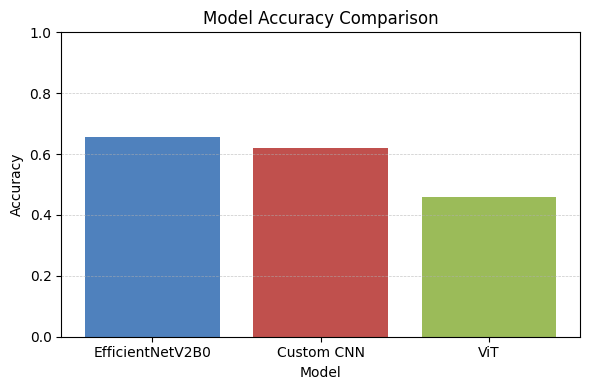

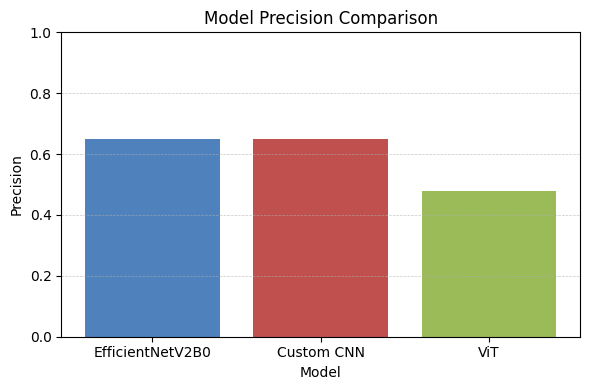

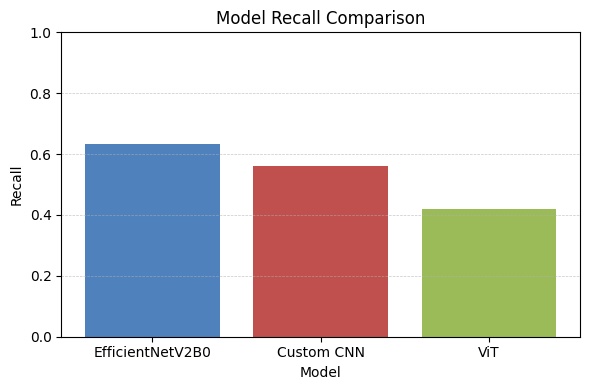

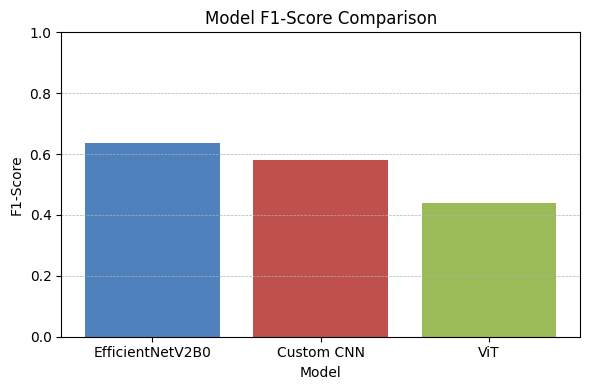

In [1]:
# ...existing code...

# ================================
# Comparison plots for 3 models
# ================================
import pandas as pd
import matplotlib.pyplot as plt

# Model metrics (replace with your actual results if needed)
metrics = {
    "Model": ["EfficientNetV2B0", "Custom CNN", "ViT"],
    "Accuracy":   [0.6562, 0.6194, 0.4600],
    "Precision":  [0.6482, 0.6500, 0.4800],
    "Recall":     [0.6340, 0.5600, 0.4200],
    "F1-Score":   [0.6358, 0.5800, 0.4400],
}
df = pd.DataFrame(metrics)

# 1. Accuracy comparison
plt.figure(figsize=(6, 4))
plt.bar(df["Model"], df["Accuracy"], color=['#4F81BD', '#C0504D', '#9BBB59'])
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Precision comparison
plt.figure(figsize=(6, 4))
plt.bar(df["Model"], df["Precision"], color=['#4F81BD', '#C0504D', '#9BBB59'])
plt.ylim(0, 1)
plt.title("Model Precision Comparison")
plt.ylabel("Precision")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Recall comparison
plt.figure(figsize=(6, 4))
plt.bar(df["Model"], df["Recall"], color=['#4F81BD', '#C0504D', '#9BBB59'])
plt.ylim(0, 1)
plt.title("Model Recall Comparison")
plt.ylabel("Recall")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 4. F1-score comparison
plt.figure(figsize=(6, 4))
plt.bar(df["Model"], df["F1-Score"], color=['#4F81BD', '#C0504D', '#9BBB59'])
plt.ylim(0, 1)
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=1)
plt.tight_layout()
plt.show()
# ...existing

In [6]:
import pandas as pd


data = {
    "Model": ["EfficientNetV2B0", "Custom CNN", "ViT"],
    "Accuracy": [0.6562, 0.6194, 0.4600],
    "Precision": [0.6482, 0.6500, 0.4800],
    "Recall": [0.6340, 0.5600, 0.4200],
    "F1-score": [0.6358, 0.5800, 0.4400]
}

#DataFrame
df_results = pd.DataFrame(data)


print(df_results)


              Model  Accuracy  Precision  Recall  F1-score
0  EfficientNetV2B0    0.6562     0.6482   0.634    0.6358
1        Custom CNN    0.6194     0.6500   0.560    0.5800
2               ViT    0.4600     0.4800   0.420    0.4400


In [9]:

latex_table = df_results.to_latex(index=False, float_format="%.4f")
print(latex_table)


\begin{tabular}{lrrrr}
\toprule
Model & Accuracy & Precision & Recall & F1-score \\
\midrule
EfficientNetV2B0 & 0.6562 & 0.6482 & 0.6340 & 0.6358 \\
Custom CNN & 0.6194 & 0.6500 & 0.5600 & 0.5800 \\
ViT & 0.4600 & 0.4800 & 0.4200 & 0.4400 \\
\bottomrule
\end{tabular}



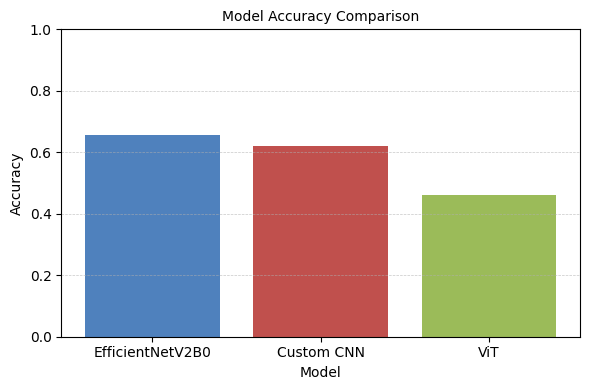

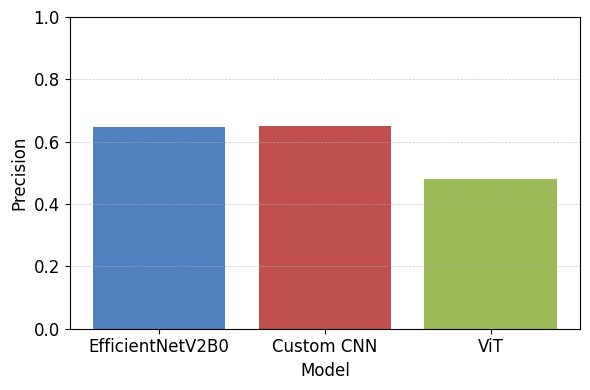

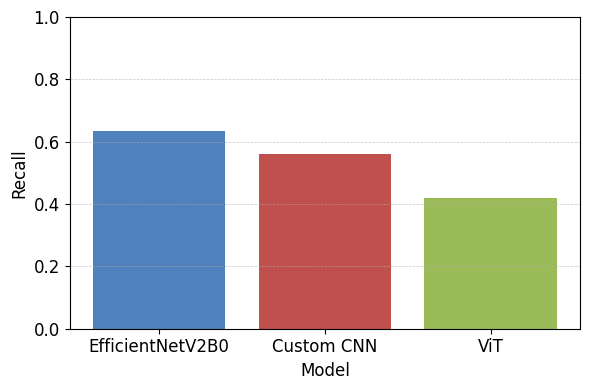

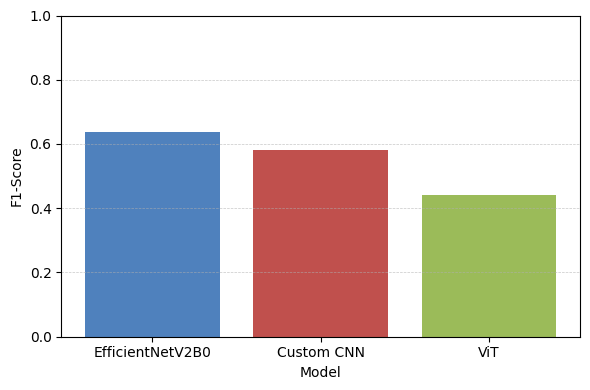

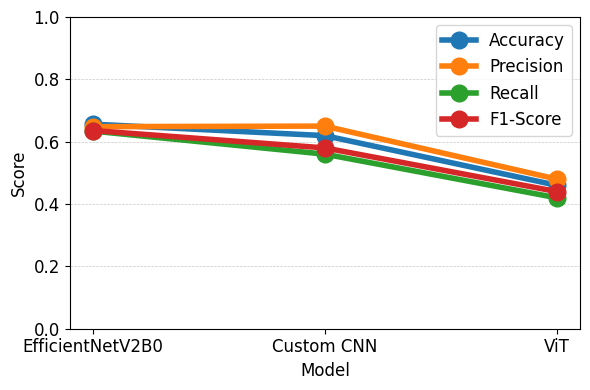

In [19]:
# ...existing code...

# ================================
# Comparison plots for 3 models (full screen)
# ================================
import pandas as pd
import matplotlib.pyplot as plt

# Model metrics (replace with your actual results if needed)
metrics = {
    "Model": ["EfficientNetV2B0", "Custom CNN", "ViT"],
    "Accuracy":   [0.6562, 0.6194, 0.4600],
    "Precision":  [0.6482, 0.6500, 0.4800],
    "Recall":     [0.6340, 0.5600, 0.4200],
    "F1-Score":   [0.6358, 0.5800, 0.4400],
}
df = pd.DataFrame(metrics)

# 1. Accuracy comparison (Bar, full screen)
plt.figure(figsize=(6, 4))
plt.bar(df["Model"], df["Accuracy"], color=['#4F81BD', '#C0504D', '#9BBB59'])
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.xlabel("Model", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Precision comparison (Bar, full screen)
plt.figure(figsize=(6, 4))
plt.bar(df["Model"], df["Precision"], color=['#4F81BD', '#C0504D', '#9BBB59'])
plt.ylim(0, 1)
#plt.title("Model Precision Comparison", fontsize=10)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Recall comparison (Bar, full screen)
plt.figure(figsize=(6, 4))
plt.bar(df["Model"], df["Recall"], color=['#4F81BD', '#C0504D', '#9BBB59'])
plt.ylim(0, 1)
#plt.title("Model Recall Comparison", fontsize=20)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 4. F1-score comparison (Bar, full screen)
plt.figure(figsize=(6, 4))
plt.bar(df["Model"], df["F1-Score"], color=['#4F81BD', '#C0504D', '#9BBB59'])
plt.ylim(0, 1)
#plt.title("Model F1-Score Comparison", fontsize=20)
plt.ylabel("F1-Score", fontsize=10)
plt.xlabel("Model", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Line chart: All metrics for all models at once (full screen)
plt.figure(figsize=(6, 4))
for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    plt.plot(df["Model"], df[metric], marker='o', label=metric, linewidth=4, markersize=12)
plt.ylim(0, 1)
#plt.title("Model Comparison: Accuracy, Precision, Recall, F1-Score", fontsize=20)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()
#

# **impement an UI to test three models**

In [39]:
!pip install gradio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 30.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.5/324.5 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 96.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.4 MB/s eta 0:00:00


In [43]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image
import os


theme = gr.themes.Default(
    text_size=gr.themes.sizes.text_lg, # For labels, descriptions, etc.
    font=[gr.themes.GoogleFont("Inter"), "ui-sans-serif", "system-ui", "sans-serif"],
)

@tf.keras.utils.register_keras_serializable(package='Custom')
class PreprocessLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    
    def call(self, inputs):
        # EfficientNet
        return tf.keras.applications.efficientnet.preprocess_input(inputs)
    
    def get_config(self):
        return super().get_config()

# 1.  TensorFlow
@tf.keras.utils.register_keras_serializable()
class RepeatChannel(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    def call(self, inputs):
        return tf.repeat(inputs, 3, axis=-1)
    def get_config(self):
        return super().get_config()

@tf.keras.utils.register_keras_serializable()
class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size=6, **kwargs):
        super().__init__(**kwargs)
        self.patch_size = patch_size
    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID")
        return tf.reshape(patches, [batch_size, -1, patches.shape[-1]])
    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

# 2.Emotion Labels
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# 3. Loading models with ordinary layers
custom_objects = {
    "RepeatChannel": RepeatChannel,
    "Patches": Patches,
    "PreprocessLayer": PreprocessLayer,
    "Custom>RepeatChannel": RepeatChannel,
    "Custom>Patches": Patches,
    "Custom>PreprocessLayer": PreprocessLayer
}

# 4. safe_mode=False
def load_single_model(path):
    try:
        return tf.keras.models.load_model(
            path,
            custom_objects=custom_layers,
            compile=False,
            safe_mode=False
        )
    except Exception as e:
        print(f"❌ error loading «{os.path.basename(path)}»: {e}")
        return None

# 5. loading all models
def load_models():
    models = {}
    try:
        models["EfficientNetV2B0"] = tf.keras.models.load_model(
            "/kaggle/input/v2b0keras/best_v2b0_model.keras",
            custom_objects=custom_objects,
            compile=False,
            safe_mode=False
        )
    except Exception as e:
        print(f" final error: {str(e)}")
        print("\nother solution with weights")
        models["EfficientNetV2B0"] = build_effnet_from_weights()
    
    # loading other models
    models["ViT"] = tf.keras.models.load_model(
        "/kaggle/input/vitkeras/best_Vit_model.keras",
        custom_objects={"Patches": Patches},
        compile=False
    )
    models["CNN"] = tf.keras.models.load_model(
        "/kaggle/input/cnnkeras/best_CNN_model.keras",
        compile=False
    )
    
    return models

# 6. unsuccessfull models
print("in progress loading...")
models = load_models()
available_models = {name: model for name, model in models.items() if model is not None}
print("loaded models:", list(available_models.keys()))

if not available_models:
    raise ValueError("no model is loaded!")

# 7. emotion prediction
def predict_emotion(img, model_name):
    model = available_models[model_name]
    try:
        img = img.convert("L").resize((48, 48))
        arr = np.array(img).reshape(1, 48, 48, 1).astype("float32") / 255.0
        pred = model.predict(arr)
        return f"‌predict: {emotion_labels[np.argmax(pred)]} (model: {model_name})"
    except Exception as e:
        return f"prediction error  : {str(e)}"

# 8.  Gradio

iface = gr.Interface(
    fn=predict_emotion,
    inputs=[
        gr.Image(type="pil", label="Upload an Image"),
        gr.Radio(list(available_models.keys()), label="Choose a Model")
    ],
    outputs=gr.Label(label="Result"), # Use gr.Label for better classification output
    title="Facial Emotion Recognition",
    description="Upload an image and select a model to predict the emotion.",
  
)

iface.launch(share=True)


in progress loading...
loaded models: ['EfficientNetV2B0', 'ViT', 'CNN']
* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://fb01badf0eb91c079b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 626, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 350, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2235, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1746, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
